<a href="https://colab.research.google.com/github/mtello5/IS170_Machine_Learning/blob/Principal-Component-Analysis/Lab6ValenzuelaTello.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The data contains both data and labels (data is in .data and labels in .target)

In [ ]:
#wine  data comes with the sklearn library
from sklearn.datasets import load_wine

In [ ]:
#load_wine_ gives both labels and the data. Let's fetch the data.
wine=load_wine()
wine_data=wine.data

In [ ]:
#check the shape of the data
wine_data.shape

(178, 13)

In [ ]:
#rename
wine_labels=wine.target


In [ ]:
#Let's concatenate the data and labels together for a Dataframe (CSV format)
import numpy as np
labels = np.reshape(wine_labels, (178,1))
final_wine_data=np.concatenate([wine_data,labels],axis=1)
final_wine_data.shape

(178, 14)

In [ ]:
#final_wine_data changes to dataframe
import pandas as pd
wine_dataset = pd.DataFrame(final_wine_data)

In [ ]:
#let's check the features
features=wine.feature_names
features

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [ ]:
#label is missing, so add it here
features_labels=np.append(features,'label')
#add the column names to the dataframe
wine_dataset.columns=features_labels
wine_dataset.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


In [ ]:
wine_dataset.tail()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740.0,2.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750.0,2.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835.0,2.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840.0,2.0
177,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560.0,2.0


### Data Normalization & Visualization

In [ ]:
#Before we do the data visualization, we'll normalize the data.
#The data normalization is a common practice 
#StandardScaler is the normalizing function.
#After the normalization, we'll do fit_transform on the data.
from sklearn.preprocessing import StandardScaler
x=wine_dataset.loc[:,features].values
x=StandardScaler().fit_transform(x) 


In [ ]:
x.shape

(178, 13)

In [ ]:
#normalized data has a mean of zero and a standard deviation of one
np.mean(x), np.std(x)

(4.66735072755122e-16, 1.0)

In [ ]:
#converting the normalized features into a dataframe form
feat_cols=['feature'+str(i) for i in range(x.shape[1])]
normalized_wine=pd.DataFrame(x,columns=feat_cols)
normalized_wine.head()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [ ]:
#For the PCA, we'll try components 2
from sklearn.decomposition import PCA
pca_wine=PCA(n_components=2)
principalComponents_wine=pca_wine.fit_transform(x)


In [ ]:
principal_wine_DF=pd.DataFrame(data=principalComponents_wine, columns=['principal component1', 'principal component2'])

In [ ]:
principal_wine_DF.head()

,principal component1,principal component2
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831


Once you have the principal components, you can find the explained_variance_ratio. It will provide you with the amount of information or variance each principal component holds after projecting the data to a lower dimensional subspace.

In [ ]:
print('Explained variation per principal component: {}'.format(pca_wine.explained_variance_ratio_))

Explained variation per principal component: [0.36198848 0.1920749 ]


The results above tells us that the principal component 1 holds 36% of the information and the principal component 2 holds 19%. 

<Figure size 432x288 with 0 Axes>

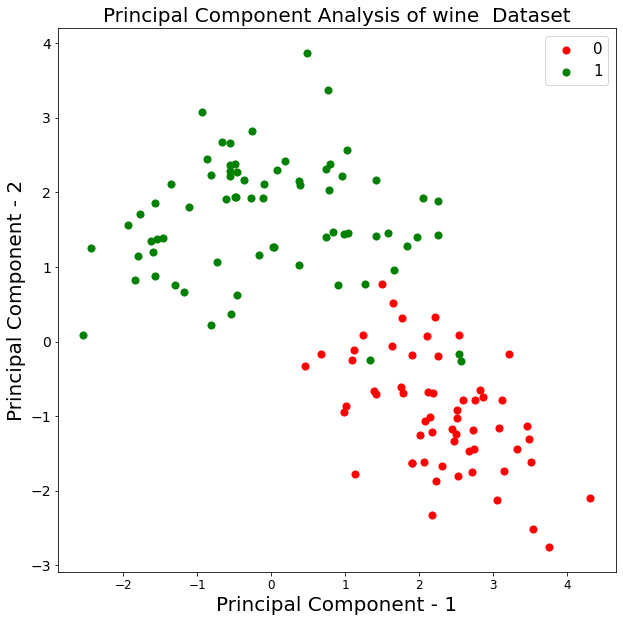

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of wine  Dataset",fontsize=20)
targets = [0,1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = wine_dataset['label'] == target
    plt.scatter(principal_wine_DF.loc[indicesToKeep, 'principal component1']
               , principal_wine_DF.loc[indicesToKeep, 'principal component2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

Note about the component number: the question of what determines the component numnber is bit unclear as this is a unsupervised algorithm (data mining). (This wine  data is clearly labeled with benigh and malignant). There are several approaches to in acquiring the number - the scree test, eigenvalues over 1, the skew test, etc.... The "trial and error" will be your best bet in determining what works best. 

Note: 0 is benigh and 1 is malignant.

In [ ]:
#wine  data comes with the sklearn library
from sklearn.datasets import load_iris

In [ ]:
iris=load_iris()
iris_data=iris.data

In [ ]:
iris_data.shape

(150, 4)

In [ ]:
iris_labels=iris.target

In [ ]:
#Let's concatenate the data and labels together for a Dataframe (CSV format)
import numpy as np
labels = np.reshape(iris_labels, (150,1))
final_iris_data=np.concatenate([iris_data,labels],axis=1)
final_iris_data.shape

(150, 5)

In [ ]:
import pandas as pd
iris_dataset=pd.DataFrame(final_iris_data)

In [ ]:
features=iris.feature_names
features

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
features_labels=np.append(features, 'label')
iris_dataset.columns=features_labels
iris_dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [ ]:
iris_dataset.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0
149,5.9,3.0,5.1,1.8,2.0


In [ ]:
#data normalization
from sklearn.preprocessing import StandardScaler
x=iris_dataset.loc[:,features].values
x=StandardScaler().fit_transform(x)

In [ ]:
x.shape

(150, 4)

In [ ]:
np.mean(x), np.std(x)

(-1.4684549872375404e-15, 1.0)

normalizing data with a mean of 0 and std of 1

In [ ]:
#making our features into a dataframe
feat_cols=['feature'+str(i) for i in range(x.shape[1])]
normalized_iris=pd.DataFrame(x,columns=feat_cols)
normalized_iris.head()

,feature0,feature1,feature2,feature3
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [ ]:
from sklearn.decomposition import PCA
pca_iris=PCA(n_components=2)
principalComponents_iris=pca_iris.fit_transform(x)

In [ ]:
principal_iris_DF=pd.DataFrame(data=principalComponents_iris, columns=['principal component1', 'principal component2'])

In [ ]:
principal_iris_DF.head()

,principal component1,principal component2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


In [ ]:
print('Explained variation per principal component: {}'.format(pca_iris.explained_variance_ratio_))

Explained variation per principal component: [0.72962445 0.22850762]


this tell us that component 1 holds 73% of the information and principle compnent 2 holds 23% of the information

<Figure size 432x288 with 0 Axes>

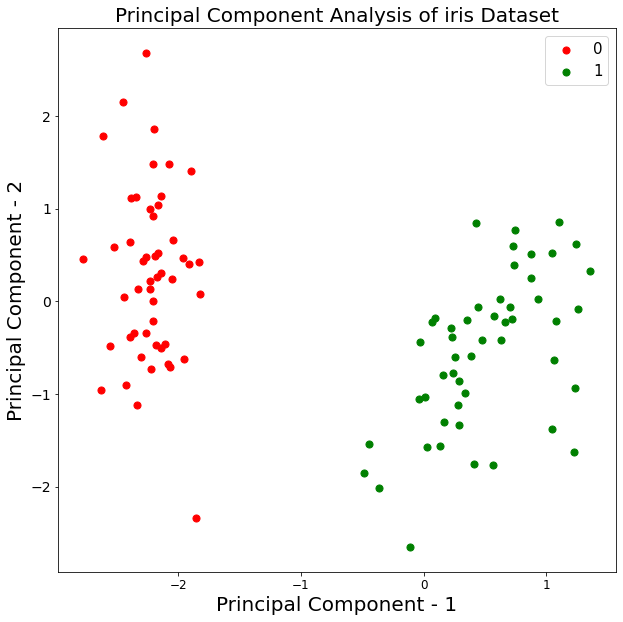

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of iris Dataset",fontsize=20)
targets = [0,1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = iris_dataset['label'] == target
    plt.scatter(principal_iris_DF.loc[indicesToKeep, 'principal component1']
               , principal_iris_DF.loc[indicesToKeep, 'principal component2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

The PCA shows the number of iris species and there characteristics. Iris species with component 1 hold 73% of the data and component 2 holda 23% of data 